In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb

In [2]:
nfb=pd.read_csv("Netflix Userbase.csv")

In [3]:
nfb

,User ID,Subscription Type,Monthly Revenue,Join Date,Last Payment Date,Country,Age,Gender,Device,Plan Duration
0,1,Basic,10,15-01-22,10-06-23,United States,28,Male,Smartphone,1 Month
1,2,Premium,15,05-09-21,22-06-23,Canada,35,Female,Tablet,1 Month
2,3,Standard,12,28-02-23,27-06-23,United Kingdom,42,Male,Smart TV,1 Month
3,4,Standard,12,10-07-22,26-06-23,Australia,51,Female,Laptop,1 Month
4,5,Basic,10,01-05-23,28-06-23,Germany,33,Male,Smartphone,1 Month
...,...,...,...,...,...,...,...,...,...,...
2495,2496,Premium,14,25-07-22,12-07-23,Spain,28,Female,Smart TV,1 Month
2496,2497,Basic,15,04-08-22,14-07-23,Spain,33,Female,Smart TV,1 Month
2497,2498,Standard,12,09-08-22,15-07-23,United States,38,Male,Laptop,1 Month
2498,2499,Standard,13,12-08-22,12-07-23,Canada,48,Female,Tablet,1 Month


In [7]:
nfb.head()

,User ID,Subscription Type,Monthly Revenue,Join Date,Last Payment Date,Country,Age,Gender,Device,Plan Duration
0,1,Basic,10,15-01-22,10-06-23,United States,28,Male,Smartphone,1 Month
1,2,Premium,15,05-09-21,22-06-23,Canada,35,Female,Tablet,1 Month
2,3,Standard,12,28-02-23,27-06-23,United Kingdom,42,Male,Smart TV,1 Month
3,4,Standard,12,10-07-22,26-06-23,Australia,51,Female,Laptop,1 Month
4,5,Basic,10,01-05-23,28-06-23,Germany,33,Male,Smartphone,1 Month


In [9]:
nfb.describe()

,User ID,Monthly Revenue,Age
count,2500.00000,2500.000000,2500.000000
mean,1250.50000,12.508400,38.795600
std,721.83216,1.686851,7.171778
min,1.00000,10.000000,26.000000
25%,625.75000,11.000000,32.000000
50%,1250.50000,12.000000,39.000000
75%,1875.25000,14.000000,45.000000
max,2500.00000,15.000000,51.000000


In [11]:
nfb.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2500 entries, 0 to 2499
Data columns (total 10 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   User ID            2500 non-null   int64 
 1   Subscription Type  2500 non-null   object
 2   Monthly Revenue    2500 non-null   int64 
 3   Join Date          2500 non-null   object
 4   Last Payment Date  2500 non-null   object
 5   Country            2500 non-null   object
 6   Age                2500 non-null   int64 
 7   Gender             2500 non-null   object
 8   Device             2500 non-null   object
 9   Plan Duration      2500 non-null   object
dtypes: int64(3), object(7)
memory usage: 195.4+ KB


In [13]:
nfb.isnull().sum()

User ID              0
Subscription Type    0
Monthly Revenue      0
Join Date            0
Last Payment Date    0
Country              0
Age                  0
Gender               0
Device               0
Plan Duration        0
dtype: int64

In [15]:
nfb.nunique()

User ID              2500
Subscription Type       3
Monthly Revenue         6
Join Date             300
Last Payment Date      26
Country                10
Age                    26
Gender                  2
Device                  4
Plan Duration           1
dtype: int64

In [17]:
nfb.columns

Index(['User ID', 'Subscription Type', 'Monthly Revenue', 'Join Date',
       'Last Payment Date', 'Country', 'Age', 'Gender', 'Device',
       'Plan Duration'],
      dtype='object')

In [19]:
nfb.groupby('Subscription Type')['Monthly Revenue'].mean()

Subscription Type
Basic       12.481481
Premium     12.590723
Standard    12.464844
Name: Monthly Revenue, dtype: float64

In [21]:
Total_revenue=nfb.groupby('Country')['Monthly Revenue'].sum().sort_values(ascending=False)
Total_revenue

Country
United States     5664
Spain             5662
Canada            3950
United Kingdom    2318
Italy             2317
France            2307
Brazil            2285
Australia         2271
Germany           2260
Mexico            2237
Name: Monthly Revenue, dtype: int64

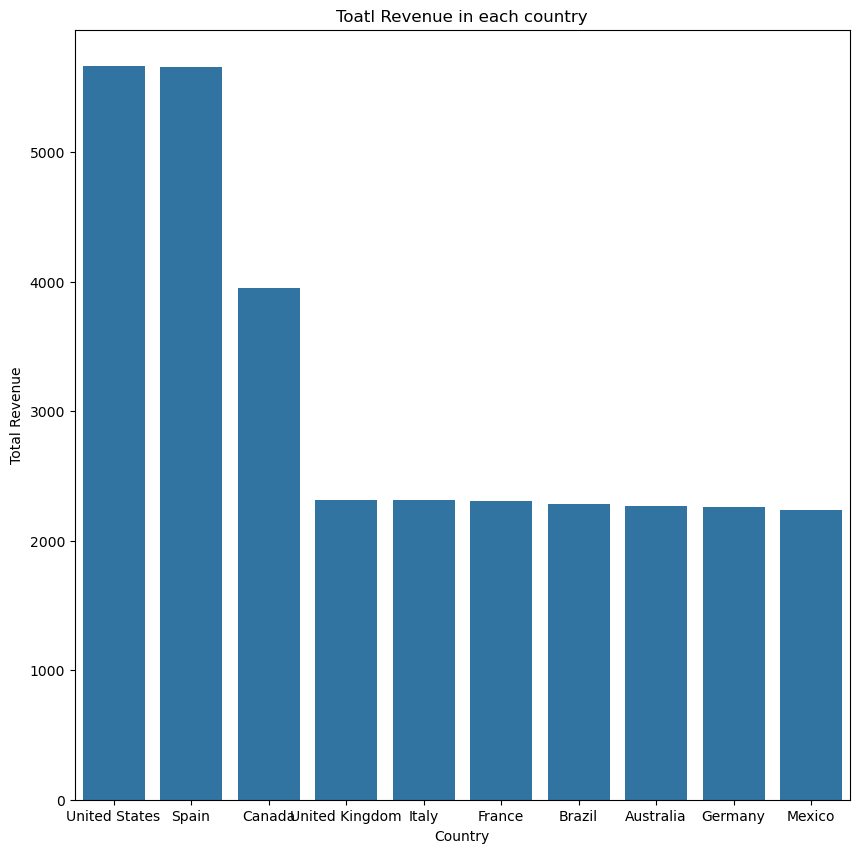

In [23]:
plt.figure(figsize=(10,10))
Total_revenuedf=Total_revenue.reset_index()
sb.barplot(x='Country',y='Monthly Revenue',data=Total_revenuedf)
plt.title("Toatl Revenue in each country")
plt.xlabel('Country')
plt.ylabel('Total Revenue')
plt.show()

In [24]:
No_of_users_bycountry=nfb.groupby("Country")["User ID"].count().sort_values(ascending=False)
No_of_users_bycountry

Country
Spain             451
United States     451
Canada            317
Australia         183
Brazil            183
France            183
Germany           183
Italy             183
Mexico            183
United Kingdom    183
Name: User ID, dtype: int64

In [27]:
Plan_duration_byage=nfb.groupby('Plan Duration')['Age'].median().sort_values(ascending=False)
Plan_duration_byage

Plan Duration
1 Month    39.0
Name: Age, dtype: float64

In [83]:
Total_revenue_byGender=nfb.groupby('Gender')['Monthly Revenue'].sum().sort_values(ascending=False)
Total_revenue_byGender

Gender
Female    15736
Male      15535
Name: Monthly Revenue, dtype: int64

In [89]:
Device_type=nfb.groupby('Device')['Age'].mean().sort_values(ascending=False)
Device_type

Device
Laptop        39.036164
Smartphone    38.726248
Tablet        38.720379
Smart TV      38.693443
Name: Age, dtype: float64

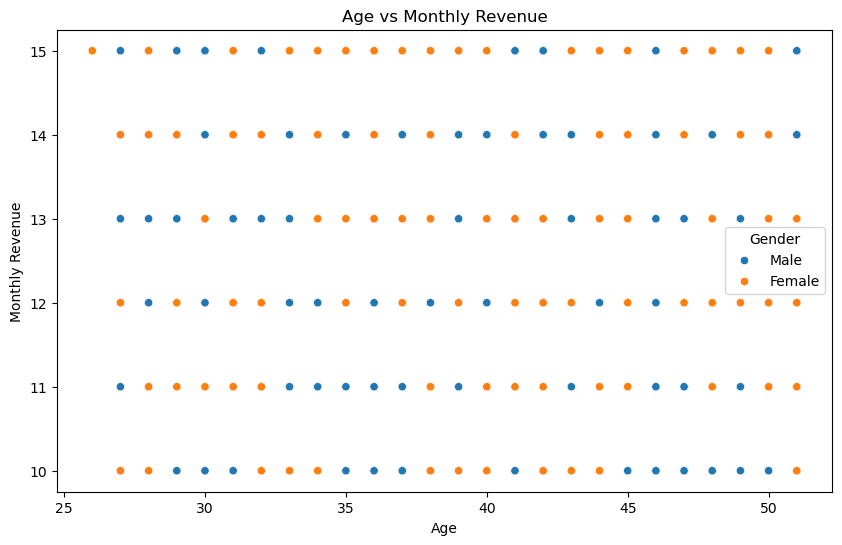

In [133]:
plt.figure(figsize=(10,6))
sb.scatterplot(x='Age',y='Monthly Revenue',hue='Gender',data=nfb)
plt.xlabel('Age')
plt.ylabel('Monthly Revenue')
plt.title('Age vs Monthly Revenue')
plt.show()

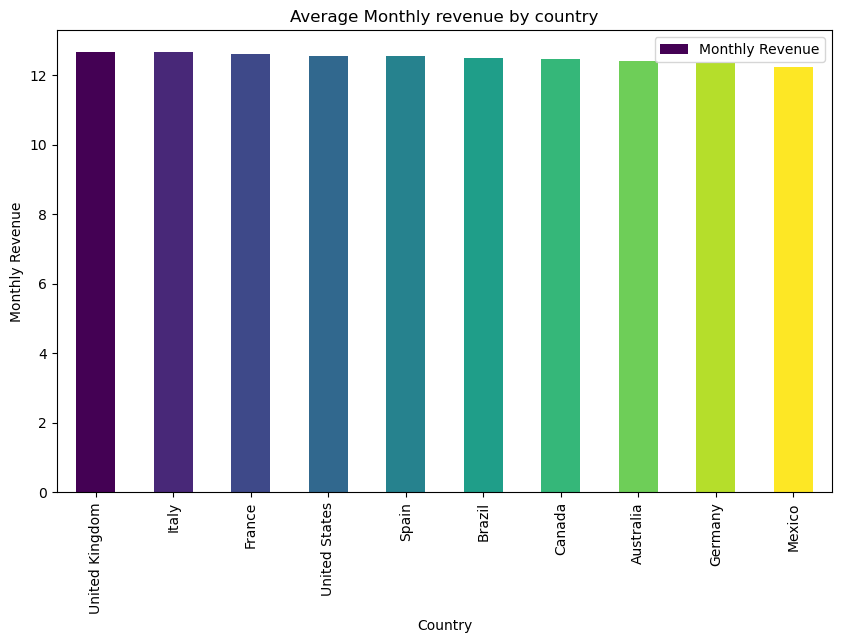

In [179]:
import random
Avg_revenue=nfb.groupby('Country')['Monthly Revenue'].mean().sort_values(ascending=False)
Avg_revenuedf=Avg_revenue.reset_index()
#plt.figure(figsize=(10,6))
country=nfb['Country']
#colors = [plt.cm.viridis(random.random()) for _ in range(len(country))]
#colors = [plt.cm.coolwarm(random.random()) for _ in range(len(country))]
#colors = [plt.cm.Pastel1(random.random()) for _ in range(len(country))]
#colors = [plt.cm.Spectral(random.random()) for _ in range(len(country))]
colors = plt.cm.viridis(np.linspace(0, 1, len(Avg_revenuedf)))
Avg_revenuedf.plot(kind='bar',x='Country',y='Monthly Revenue',figsize=(10,6),color=colors)
#sb.barplot(x='Country',y="Monthly Revenue",data=Avg_revenuedf)
plt.title('Average Monthly revenue by country')
plt.xlabel('Country')
plt.ylabel('Monthly Revenue')
#plt.xticks(rotation=90)
plt.show()

# colors for plt 📊
## Sequential  : viridis, plasma, inferno

## Diverging   : coolwarm, Spectral

## Categorical :  tab10, Set1, Pastel1

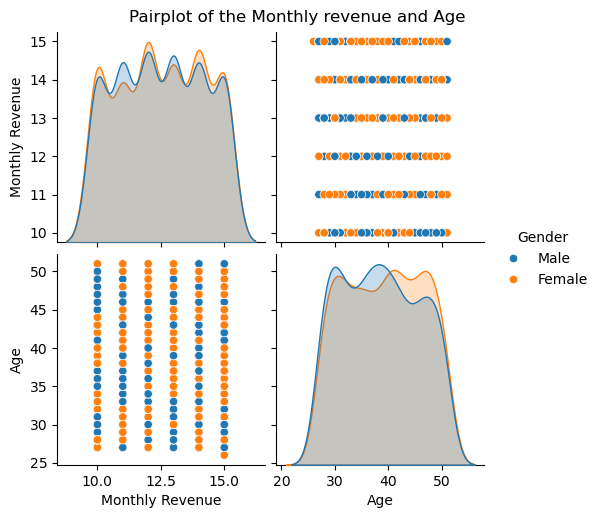

In [228]:
numerical_columns=['Monthly Revenue','Age']
sb.pairplot(nfb[numerical_columns+['Gender']],hue='Gender',diag_kind='kde')
plt.suptitle('Pairplot of the Monthly revenue and Age',y=1.02)
plt.show()

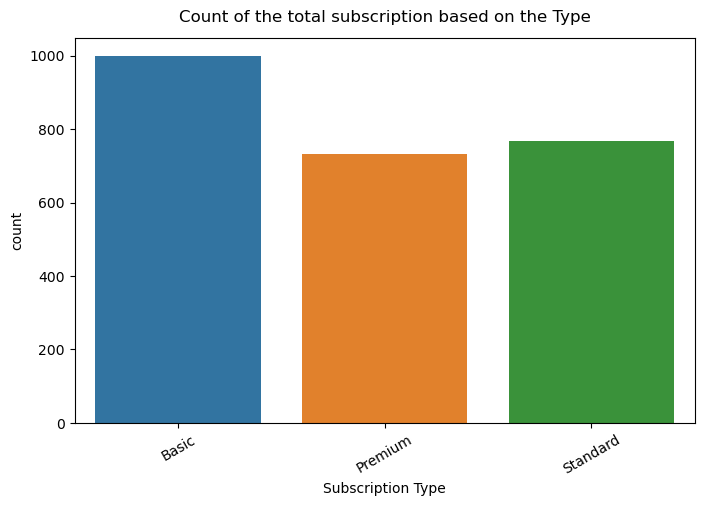

In [278]:
plt.figure(figsize=(8,5))
sb.countplot(x='Subscription Type',hue='Subscription Type',data=nfb,palette='tab10',legend=False)
plt.title("Count of the total subscription based on the Type",y=1.02)
plt.xticks(rotation=30)
plt.show()

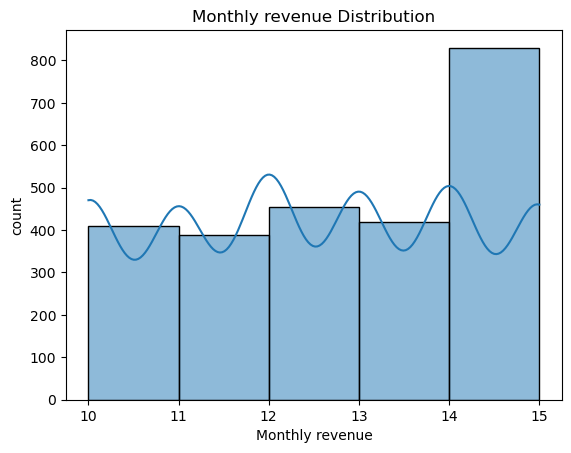

In [312]:
sb.histplot(nfb['Monthly Revenue'],bins=5,kde=True)
plt.title('Monthly revenue Distribution')
plt.xlabel('Monthly revenue')
plt.ylabel('count')
plt.show()

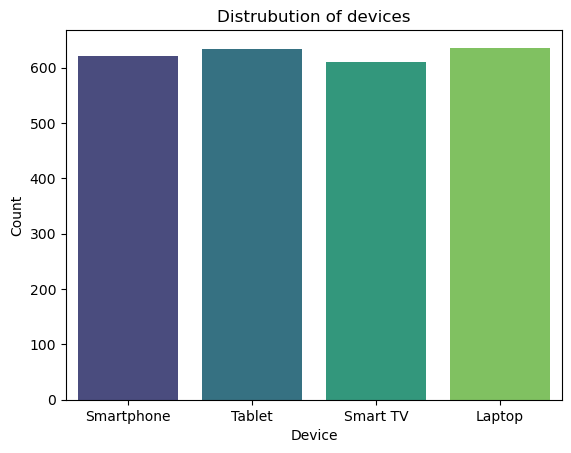

In [316]:
sb.countplot(x='Device',hue='Device',data=nfb,palette='viridis')
plt.xlabel('Device')
plt.ylabel('Count')
plt.title('Distrubution of devices')
plt.show()

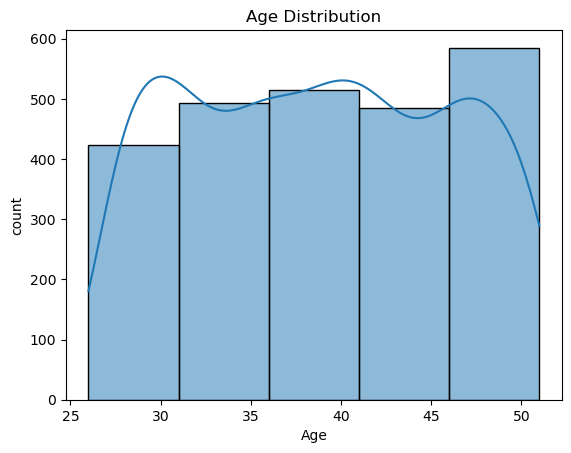

In [320]:
sb.histplot(nfb['Age'],bins=5,kde=True)
plt.title('Age Distribution')
plt.xlabel('Age')
plt.ylabel('count')
plt.show()